<a href="https://colab.research.google.com/github/venkeychintha/CNN/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Augmentation to Address Overfitting in Flower classification CNN

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2  
import os
import PIL  #Image library in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load flowers dataset

In [52]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [53]:
data_dir

'./datasets/flower_photos'

In [54]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [55]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2535769822_513be6bbe9.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6132275522_ce46b33c33_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8689302100_be76a16ccc_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8979062599_86cac547b8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2443192475_c64c66d9c2.jpg')]

In [56]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [57]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg')]

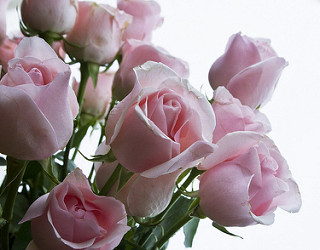

In [58]:
PIL.Image.open(str(roses[1]))

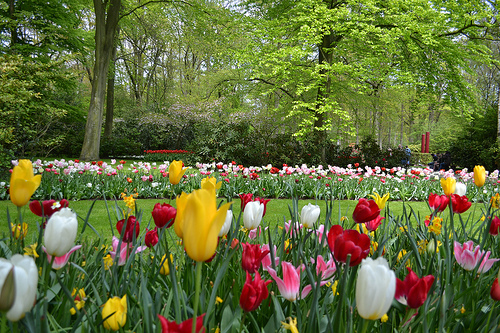

In [59]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [60]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [61]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [62]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg')]

In [63]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4248222578_b4d5868b32.jpg'

In [64]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) 
#opencv is just read the image from disk and converted into three dimensional numpy array

In [65]:
img.shape

(264, 500, 3)

In [66]:
# all images are not in same size that why we resize the all images
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [67]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [68]:
#convert this into array
X = np.array(X)
y = np.array(y)

### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
len(X_train)

2752

In [71]:
len(X_test)

918

### preprocessing : scale images

In [72]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

In [73]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15) 

Epoch 1/30
86/86 [==============================] - 74s 859ms/step - loss: 1.3174 - accuracy: 0.4386
Epoch 2/30
86/86 [==============================] - 85s 986ms/step - loss: 0.9890 - accuracy: 0.6156
Epoch 3/30
86/86 [==============================] - 77s 888ms/step - loss: 0.7818 - accuracy: 0.7035
Epoch 4/30
86/86 [==============================] - 76s 886ms/step - loss: 0.6059 - accuracy: 0.7831
Epoch 5/30
86/86 [==============================] - 71s 826ms/step - loss: 0.3725 - accuracy: 0.8677
Epoch 6/30
86/86 [==============================] - 71s 831ms/step - loss: 0.2104 - accuracy: 0.9328
Epoch 7/30
86/86 [==============================] - 71s 826ms/step - loss: 0.1275 - accuracy: 0.9640
Epoch 8/30
86/86 [==============================] - 71s 827ms/step - loss: 0.0995 - accuracy: 0.9731
Epoch 9/30
86/86 [==============================] - 71s 828ms/step - loss: 0.0661 - accuracy: 0.9833
Epoch 10/30
86/86 [==============================] - 71s 827ms/step - loss: 0.0468 - accura

In [74]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 234ms/step - loss: 2.6974 - accuracy: 0.6340


[2.697364330291748, 0.6339869499206543]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [75]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -3.4978273 ,   0.48707008,   8.680158  , -12.115229  ,
        -10.351089  ],
       [ 15.867445  ,  -5.0482855 , -10.183048  ,  -9.7768955 ,
          0.79628605],
       [ -5.1623983 ,  -2.5515373 ,  13.566638  , -13.252274  ,
         -9.203687  ],
       ...,
       [ -6.356226  ,  -3.1208994 ,   1.8756907 ,   8.937529  ,
         -8.34398   ],
       [  7.8119073 ,  -7.027571  ,  -9.292751  ,  -6.1950536 ,
          3.4660606 ],
       [ -6.137833  ,  -8.3829    ,   1.4620621 ,   3.5890963 ,
          3.5267448 ]], dtype=float32)

In [76]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.1409797e-06, 2.7648077e-04, 9.9971837e-01, 9.3015590e-10,
       5.4289080e-09], dtype=float32)>

In [77]:
np.argmax(score)

2

In [78]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation

In [79]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    #layers.experimental.preprocessing.RandomContrast(0.5),
    #layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,  img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1)
])

#### original image

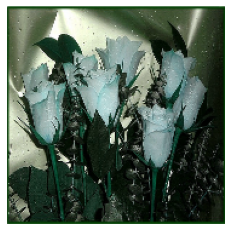

In [82]:
plt.axis('off')
plt.imshow(X[5])

####Newly generated training sample using data augmentation

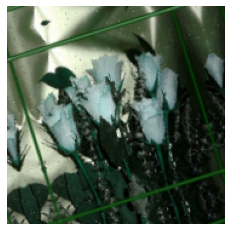

In [83]:
plt.axis('off')
plt.imshow(data_augmentation(X)[5].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [84]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)  

Epoch 1/15
86/86 [==============================] - 85s 980ms/step - loss: 1.3989 - accuracy: 0.3892
Epoch 2/15
86/86 [==============================] - 84s 975ms/step - loss: 1.1321 - accuracy: 0.5302
Epoch 3/15
86/86 [==============================] - 85s 985ms/step - loss: 1.0505 - accuracy: 0.5977
Epoch 4/15
86/86 [==============================] - 84s 972ms/step - loss: 0.9634 - accuracy: 0.6279
Epoch 5/15
86/86 [==============================] - 87s 1s/step - loss: 0.9141 - accuracy: 0.6544
Epoch 6/15
86/86 [==============================] - 83s 967ms/step - loss: 0.8420 - accuracy: 0.6813
Epoch 7/15
86/86 [==============================] - 83s 969ms/step - loss: 0.8174 - accuracy: 0.6839
Epoch 8/15
86/86 [==============================] - 83s 967ms/step - loss: 0.7791 - accuracy: 0.6991
Epoch 9/15
86/86 [==============================] - 83s 966ms/step - loss: 0.7424 - accuracy: 0.7180
Epoch 10/15
86/86 [==============================] - 83s 966ms/step - loss: 0.6893 - accuracy:

In [85]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 233ms/step - loss: 0.8454 - accuracy: 0.6972


[0.8454456329345703, 0.6971677541732788]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%